# Nguyễn Đồng Thanh - 23127538 - Lab2: Numpy for Data Science

# 1. Thông tin về dữ liệu

Để hiểu tập dữ liệu hơn, chúng ta cùng lên Kaggle và đọc một vài thông tin liên quan được trình bày trên đó. 

Một số thông tin em tìm được:

- **Nguồn dữ liệu:** [Kaggle - Credit Card Customers](https://www.kaggle.com/datasets/sakshigoyal7/credit-card-customers)
- **Tác giả:** Sakshi Goyal
- **Bài toán:** Dự đoán khách hàng nào sẽ rời bỏ dịch vụ ngân hàng (Churn Prediction) để ngân hàng có thể chủ động giữ chân họ.

**Ý nghĩa các cột dữ liệu quan trọng:**
Bộ dữ liệu này bao gồm thông tin về nhân khẩu học, mối quan hệ với ngân hàng và lịch sử giao dịch:

* **CLIENTNUM:** Mã định danh duy nhất của khách hàng.
* **Attrition_Flag:** Target Variable. Cho biết khách hàng còn sử dụng dịch vụ (`Existing Customer`) hay đã rời bỏ (`Attrited Customer`).
* **Customer_Age, Gender, Dependent_count:** Tuổi, Giới tính, Số người phụ thuộc.
* **Education_Level:** Trình độ học vấn (High School, Graduate, Uneducated, etc.).
* **Marital_Status:** Tình trạng hôn nhân.
* **Income_Category:** Nhóm thu nhập hàng năm.
* **Card_Category:** Loại thẻ (Blue, Silver, Gold, Platinum).
* **Months_on_book:** Thời gian khách hàng đã gắn bó với ngân hàng (tính bằng tháng).
* **Total_Relationship_Count:** Tổng số sản phẩm/dịch vụ khách hàng đang sử dụng.
* **Months_Inactive_12_mon:** Số tháng không hoạt động trong 12 tháng qua.
* **Contacts_Count_12_mon:** Số lần liên hệ với ngân hàng trong 12 tháng qua.
* **Credit_Limit:** Hạn mức tín dụng.
* **Total_Revolving_Bal:** Tổng số dư nợ quay vòng.
* **Avg_Open_To_Buy:** Hạn mức tín dụng còn khả dụng trung bình (Credit Limit - Revolving Balance).
* **Total_Trans_Amt:** Tổng số tiền giao dịch (trong 12 tháng qua).
* **Total_Trans_Ct:** Tổng số lần giao dịch (trong 12 tháng qua).
* **Avg_Utilization_Ratio:** Tỷ lệ sử dụng thẻ trung bình.

## Import thư viện

In [1]:
# Import câc thư viện cần thiết

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings

# Cấu hình hiển thị
sns.set_theme(style="whitegrid")
warnings.filterwarnings('ignore')

## Khai báo hàm

In [2]:
def clean_string_columns(data: np.ndarray) -> np.ndarray:
    """
    Làm sạch các cột dạng chuỗi trong structured array.
    
    Input:
        data (np.ndarray): structured array đọc từ np.genfromtxt
    Output:
        np.ndarray: structured array sau khi đã strip khoảng trắng và dấu nháy (", ')
    Nhiệm vụ:
        Do dữ liệu categorical đang có dạng '"Blue"', '"M"', ... nên cần bỏ dấu nháy để xử lý đúng.
    """
    if data is None:
        return None

    for name in data.dtype.names:
        kind = data.dtype[name].kind  # 'U' (unicode), 'S' (bytes), 'O' (object), ...
        if kind in ('U', 'S', 'O'):
            col = data[name]

            if kind == 'S':
                col = np.char.decode(col, 'utf-8', errors='ignore')

            data[name] = np.char.strip(col.astype(str), chars=" \"'")

    return data


def load_data_numpy(filepath: str, clean_strings: bool = True) -> np.ndarray:
    """
    Đọc dữ liệu CSV bằng NumPy.
    
    Input:
        filepath (str): Đường dẫn tới file CSV.
        clean_strings (bool): Nếu True thì tự động strip khoảng trắng + dấu nháy cho các cột dạng chuỗi.
    Output:
        np.ndarray: Structured array chứa toàn bộ dữ liệu kèm tên cột.
    """
    if not os.path.exists(filepath):
        print(f"Lỗi: Không tìm thấy file tại đường dẫn: {filepath}")
        return None

    try:
        data = np.genfromtxt(filepath, delimiter=',', dtype=None, names=True, encoding='utf-8')

        if clean_strings:
            data = clean_string_columns(data)

        print("Đã load dữ liệu thành công!")
        return data
    except Exception as e:
        print(f"Có lỗi xảy ra khi đọc file: {e}")
        return None


def get_dataset_overview(data):
    """
    Mô phỏng hàm .info() của Pandas bằng Numpy.
    In ra tên cột, kiểu dữ liệu và số lượng giá trị (count).
    
    Input: data (structured array)
    """
    print(f"{'Column Name':<30} {'Data Type':<15} {'Count':<10}")
    print("-" * 60)
    for name in data.dtype.names:
        # Lấy kiểu dữ liệu
        dtype = data.dtype[name]
        # Đếm số lượng phần tử (shape[0])
        count = data.shape[0]
        print(f"{name:<30} {str(dtype):<15} {count:<10}")

def describe_numeric_feature(data, column_name):
    """
    Mô phỏng hàm .describe() cho 1 cột số bằng Numpy.
    
    Input: 
        data: structured array
        column_name: tên cột cần thống kê
    Output: 
        Dictionary chứa các chỉ số thống kê
    """
    col_data = data[column_name]
    
    # Kiểm tra xem có phải cột số không
    if not np.issubdtype(col_data.dtype, np.number):
        return f"Cột {column_name} không phải dạng số."
    
    desc = {
        'Mean': np.mean(col_data),
        'Median': np.median(col_data),
        'Std': np.std(col_data),
        'Min': np.min(col_data),
        'Max': np.max(col_data),
        '25%': np.percentile(col_data, 25),
        '75%': np.percentile(col_data, 75)
    }
    return desc

def print_top_k_categorical_values(data: np.ndarray, k: int = 10) -> None:
    """
    In top-k giá trị xuất hiện nhiều nhất cho từng cột phân loại.

    Input:
        data (np.ndarray): structured array (đọc từ np.genfromtxt)
        k (int): số lượng giá trị top cần in (mặc định 10)

    Output:
        None (in ra màn hình)

    Nhiệm vụ:
        - Tự tìm các cột không phải số (categorical)
        - Với mỗi cột: đếm tần suất bằng np.unique(return_counts=True)
        - Sắp xếp theo tần suất giảm dần và in top-k
    """
    if data is None:
        print("Dữ liệu đang rỗng (None).")
        return

    cat_cols = [name for name in data.dtype.names if not np.issubdtype(data.dtype[name], np.number)]
    if len(cat_cols) == 0:
        print("Không có cột phân loại trong dataset.")
        return

    for col in cat_cols:
        col_data = data[col].astype(str)
        col_data = np.char.strip(col_data, chars=" \"'")  # phòng trường hợp còn dính dấu nháy

        values, counts = np.unique(col_data, return_counts=True)
        order = np.argsort(counts)[::-1]
        top = order[:min(k, values.size)]

        print("=" * 80)
        print(f"Cột phân loại: {col}")
        print(f"Số unique: {values.size}")
        print("-" * 80)
        print(f"{'Giá trị':<35} {'Tần số':>10} {'Tỷ lệ (%)':>12}")
        print("-" * 80)

        total = col_data.size
        top_values = values[top]
        top_counts = counts[top]
        top_pct = top_counts / total * 100

        # chỗ này chủ yếu là in ra (không phải tính toán), nên dùng vòng lặp cho dễ nhìn
        for v, c, p in zip(top_values, top_counts, top_pct):
            print(f"{v:<35} {int(c):>10} {p:>12.2f}")

def describe_categorical_feature(data, column_name):
    """
    Mô phỏng hàm .describe() cho 1 cột phân loại (categorical) bằng Numpy.
    
    Input: 
        data: structured array
        column_name: tên cột cần thống kê
    Output: 
        Dictionary chứa các chỉ số thống kê cho dữ liệu phân loại
    Nhiệm vụ:
        Đếm số giá trị unique, tìm giá trị xuất hiện nhiều nhất và tần số của nó
    """
    col_data = data[column_name]
    
    # Kiểm tra xem có phải cột phân loại (không phải số) không
    if np.issubdtype(col_data.dtype, np.number):
        return f"Cột {column_name} là dạng số, không phải categorical."
    
    # Tìm các giá trị unique và đếm số lần xuất hiện
    unique_values, counts = np.unique(col_data, return_counts=True)
    
    # Tìm giá trị xuất hiện nhiều nhất (mode)
    max_count_idx = np.argmax(counts)
    most_common_value = unique_values[max_count_idx]
    most_common_count = counts[max_count_idx]
    
    desc = {
        'Unique Count': len(unique_values),
        'Most Common Value': most_common_value,
        'Most Common Frequency': most_common_count,
        'Most Common Percentage': f"{(most_common_count / len(col_data)) * 100:.2f}%"
    }
    return desc




def describe_all(data, include=False):
    """
    Mô phỏng hàm .describe() của Pandas cho toàn bộ dataset bằng Numpy.
    
    Input:
        data: structured array
        include (bool): 
            - False: chỉ in thống kê các cột số
            - True: in thống kê cả cột số và cột phân loại
    Output:
        In ra thống kê mô tả của các cột
    Nhiệm vụ:
        Tự động phân loại và in thống kê cho từng loại cột
    """
    # Tách cột số và cột phân loại
    numeric_cols = [name for name in data.dtype.names if np.issubdtype(data.dtype[name], np.number)]
    categorical_cols = [name for name in data.dtype.names if not np.issubdtype(data.dtype[name], np.number)]
    
    # In thống kê các cột số
    print("="*80)
    print("THỐNG KÊ CÁC CỘT SỐ")
    print("="*80)
    
    for col in numeric_cols:
        print(f"\nCột: {col}")
        print("-" * 60)
        desc = describe_numeric_feature(data, col)
        
        for key, value in desc.items():
            print(f"  {key:<15}: {value:>12.2f}")
    
    # Nếu include=True thì in thêm thống kê các cột phân loại
    if include:
        print("\n\n")
        print("="*80)
        print("THỐNG KÊ CÁC CỘT PHÂN LOẠI")
        print("="*80)
        
        for col in categorical_cols:
            print(f"\nCột: {col}")
            print("-" * 60)
            desc = describe_categorical_feature(data, col)
            
            for key, value in desc.items():
                print(f"  {key:<25}: {value}")



def encode_ordinal(col: np.ndarray, ordered_values: list, unknown_value: float = np.nan) -> np.ndarray:
    """
    Mã hoá một cột phân loại (categorical) sang dạng số theo thứ tự (ordinal encoding).

    Ý tưởng:
        - Với danh sách ordered_values đã cho, mỗi giá trị sẽ được gán một mã số:
          ordered_values[0] -> 0, ordered_values[1] -> 1, ..., ordered_values[k-1] -> k-1
        - Các giá trị không thuộc ordered_values sẽ được gán unknown_value (mặc định là NaN).

    Input:
        col (np.ndarray):
            - Mảng 1 chiều chứa dữ liệu của cột categorical (có thể là bytes/str/object).
            - Ví dụ: ['Blue', 'Gold', 'Silver', ...]
        ordered_values (list):
            - Danh sách các mức giá trị theo đúng thứ tự mong muốn (từ thấp -> cao hoặc theo logic bạn chọn).
            - Ví dụ: ['Blue', 'Silver', 'Gold', 'Platinum']
        unknown_value (float):
            - Giá trị thay thế cho các mức không nằm trong ordered_values.
            - Thường dùng NaN để sau đó có thể lọc bỏ các dòng “Unknown” khi tính tương quan.

    Output:
        np.ndarray:
            - Mảng float 1 chiều có cùng số phần tử với col.
            - Chứa mã hoá ordinal (0..k-1) hoặc unknown_value.

    Nhiệm vụ:
        - Chuẩn hoá chuỗi bằng cách strip khoảng trắng và dấu nháy (", ')
        - Tạo mảng kết quả dạng float
        - Gán mã số cho từng mức trong ordered_values (dùng mask so sánh)

    Ghi chú:
        - Ordinal encoding giả định “khoảng cách” giữa các mức; khi dùng Pearson corr thì chỉ nên xem như tham khảo.
    """
    col = np.char.strip(col.astype(str), chars=" \"'")
    encoded = np.full(col.shape[0], unknown_value, dtype=float)

    for i, v in enumerate(ordered_values):
        encoded[col == v] = float(i)

    return encoded


def build_feature_matrix_for_corr(data: np.ndarray) -> tuple[np.ndarray, list]:
    """
    Tạo ma trận đặc trưng (feature matrix) để tính tương quan Pearson với target Attrition_Flag,
    bao gồm cả biến số (numeric) và biến phân loại (categorical) sau khi đã mã hoá.

    Mô tả:
        - Target Attrition_Flag được mã hoá:
            'Existing Customer' -> 0
            'Attrited Customer' -> 1
        - Các biến categorical được ordinal-encode theo thứ tự do mình tự định nghĩa.
        - Các biến numeric được đưa trực tiếp vào ma trận (loại bỏ CLIENTNUM vì chỉ là ID).

    Input:
        data (np.ndarray):
            - Structured array đọc từ np.genfromtxt (có names=True).
            - Yêu cầu có các cột:
              'Attrition_Flag', 'Gender', 'Education_Level', 'Income_Category', 'Card_Category', 'Marital_Status'
              và các cột numeric khác.

    Output:
        (X, feature_names):
            - X (np.ndarray):
                Ma trận 2 chiều shape (n_samples_valid, n_features), dtype float.
                Trong đó cột đầu tiên luôn là target (Attrition_Flag đã mã hoá 0/1).
            - feature_names (list):
                Danh sách tên feature tương ứng theo đúng thứ tự các cột của X.
                Ví dụ: ['Attrition_Flag', 'Gender_enc', ..., <các numeric cols>]

    Nhiệm vụ:
        - Mã hoá target 0/1 bằng np.where
        - Lấy danh sách numeric_cols và loại 'CLIENTNUM'
        - Ordinal-encode các cột categorical:
            Gender, Education_Level, Income_Category, Card_Category, Marital_Status
        - Ghép target + categorical_encoded + numeric thành một ma trận duy nhất
        - Lọc bỏ các dòng có NaN/inf (ví dụ do Unknown) để corr không bị NaN hàng loạt

    Ghi chú:
        - Vì categorical được encode theo thứ tự “tự đặt”, hệ số tương quan chỉ nên dùng để tham khảo/so sánh nhanh,
          không kết luận quan hệ nhân quả.
    """
    flag = np.char.strip(data["Attrition_Flag"].astype(str), chars=" \"'")
    y = np.where(flag == "Attrited Customer", 1.0, 0.0)

    numeric_cols = [n for n in data.dtype.names if np.issubdtype(data.dtype[n], np.number)]
    if "CLIENTNUM" in numeric_cols:
        numeric_cols.remove("CLIENTNUM")

    X_num = (
        np.column_stack([data[c].astype(float) for c in numeric_cols])
        if numeric_cols
        else np.empty((data.shape[0], 0))
    )

    gender = encode_ordinal(data["Gender"], ["F", "M", "Unknown"])
    edu = encode_ordinal(
        data["Education_Level"],
        ["Uneducated", "High School", "College", "Graduate", "Post-Graduate", "Doctorate", "Unknown"]
    )
    income = encode_ordinal(
        data["Income_Category"],
        ["Less than $40K", "$40K - $60K", "$60K - $80K", "$80K - $120K", "$120K +", "Unknown"]
    )
    card = encode_ordinal(data["Card_Category"], ["Blue", "Silver", "Gold", "Platinum", "Unknown"])
    marital = encode_ordinal(data["Marital_Status"], ["Single", "Married", "Divorced", "Unknown"])

    X_cat = np.column_stack([gender, edu, income, card, marital])
    cat_names = ["Gender_enc", "Education_Level_enc", "Income_Category_enc", "Card_Category_enc", "Marital_Status_enc"]

    X = np.column_stack([y, X_cat, X_num])
    feature_names = ["Attrition_Flag"] + cat_names + numeric_cols

    valid_rows = np.all(np.isfinite(X), axis=1)
    X = X[valid_rows]
    return X, feature_names


def compute_correlation_matrix(data):
    """
    Tính ma trận tương quan Pearson cho các cột số bằng NumPy.
    Mã hoá 'Attrition_Flag': Existing -> 0, Attrited -> 1 (có strip để tránh lệch chuỗi).
    
    Input: data (structured array)
    Output:
        corr_matrix: ma trận tương quan (numpy array)
        feature_names: danh sách tên các cột được dùng tính toán
    """
    numeric_cols = [name for name in data.dtype.names if np.issubdtype(data.dtype[name], np.number)]
    if 'CLIENTNUM' in numeric_cols:
        numeric_cols.remove('CLIENTNUM')

    # Lấy cột target và làm sạch chuỗi
    flag = data['Attrition_Flag']

    # Nếu là bytes thì decode sang str
    if flag.dtype.kind == 'S':
        flag = np.char.decode(flag, 'utf-8', errors='ignore')

    flag = np.char.strip(flag.astype(str))

    # Mã hoá target
    target_col = np.where(flag == 'Attrited Customer', 1.0, 0.0)

    # Nếu target bị 1 giá trị duy nhất thì corr sẽ ra NaN
    uniq = np.unique(target_col)
    if uniq.size < 2:
        print("Cảnh báo: Attrition_Flag sau khi mã hoá chỉ có 1 giá trị.")
        print("Các giá trị raw của Attrition_Flag (unique):", np.unique(flag))

    feature_names = ['Attrition_Flag'] + numeric_cols
    data_matrix = np.column_stack([target_col] + [data[col].astype(float) for col in numeric_cols])

    corr_matrix = np.corrcoef(data_matrix, rowvar=False)
    return corr_matrix, feature_names


def plot_feature_distribution(data, column_name):
    """
    Hàm vẽ biểu đồ phân phối và boxplot cho một cột số, 
    phân tách theo biến mục tiêu Attrition_Flag.
    
    Input:
        data: Numpy structured array
        column_name: Tên cột cần phân tích
    """
    # Lấy dữ liệu
    feature_data = data[column_name]
    target_data = data['Attrition_Flag']
    
    # Tách dữ liệu ra 2 nhóm (Masking)
    attrited_mask = (target_data == 'Attrited Customer')
    attrited_vals = feature_data[attrited_mask]
    
    existing_mask = (target_data == 'Existing Customer')
    existing_vals = feature_data[existing_mask]
    
    # --- CHỈNH SỬA Ở ĐÂY ---
    # Đổi (1, 2) thành (2, 1) để xếp dọc.
    # Tăng chiều cao figsize lên (ví dụ: 10, 12) để hình không bị dẹp.
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 12))
    
    # Biểu đồ 1: Histogram + KDE (Ở trên)
    sns.histplot(existing_vals, color='skyblue', label='Existing', kde=True, ax=ax1, stat="density", common_norm=False)
    sns.histplot(attrited_vals, color='orange', label='Attrited', kde=True, ax=ax1, stat="density", common_norm=False)
    ax1.set_title(f'Phân phối của {column_name}', fontsize=14)
    ax1.legend()
    
    # Biểu đồ 2: Boxplot (Ở dưới)
    sns.boxplot(x=target_data, y=feature_data, palette=['orange', 'skyblue'], ax=ax2)
    ax2.set_title(f'Boxplot của {column_name} theo nhóm', fontsize=14)
    
    plt.tight_layout()
    plt.show()


In [15]:
def plot_categorical_analysis(data: np.ndarray, column_name: str) -> None:
    """
    Vẽ và thống kê nhanh cho một cột phân loại (categorical) theo nhóm `Attrition_Flag`.
    
    Input:
        data (np.ndarray): Structured array sau khi load (đã/hoặc chưa clean chuỗi).
        column_name (str): Tên cột phân loại cần quan sát (vd: 'Gender', 'Education_Level', ...).
    Output:
        None (hiển thị biểu đồ).
    Nhiệm vụ:
        1) Vẽ biểu đồ số lượng (Countplot) theo từng category, tách theo `Attrition_Flag`.
        2) Vẽ biểu đồ tỷ lệ rời bỏ (Attrited rate) theo từng category để so sánh rõ hơn.
    """
    # Lấy dữ liệu và làm sạch chuỗi (phòng trường hợp còn dính dấu nháy)
    x = np.char.strip(data[column_name].astype(str), chars=" \"'")
    y = np.char.strip(data["Attrition_Flag"].astype(str), chars=" \"'")
    
    # Sắp xếp category theo tần suất giảm dần cho dễ nhìn
    categories, counts = np.unique(x, return_counts=True)
    order = categories[np.argsort(counts)[::-1]]
    
    # Tính tỷ lệ rời bỏ theo từng category (vector hoá bằng bincount)
    is_churn = (y == "Attrited Customer").astype(int)
    cats_sorted, inv = np.unique(x, return_inverse=True)  # cats_sorted được sort tăng dần
    total = np.bincount(inv)
    churn_sum = np.bincount(inv, weights=is_churn)
    churn_rate = np.divide(churn_sum, total, out=np.zeros_like(churn_sum, dtype=float), where=total > 0)
    
    # Căn chỉnh churn_rate theo đúng thứ tự order để vẽ
    idx = np.searchsorted(cats_sorted, order)
    churn_rate_order = churn_rate[idx]
    total_order = total[idx]
    
    fig, axes = plt.subplots(1, 2, figsize=(14, 5))
    
    # (1) Countplot
    sns.countplot(
        x=x,
        hue=y,
        order=order,
        hue_order=["Existing Customer", "Attrited Customer"],
        ax=axes[0]
    )
    axes[0].set_title(f"Số lượng theo {column_name} (tách theo Attrition_Flag)")
    axes[0].set_xlabel(column_name)
    axes[0].set_ylabel("Số lượng")
    axes[0].tick_params(axis='x', rotation=45)
    axes[0].legend(title="Attrition_Flag")
    
    # (2) Churn rate theo category
    axes[1].bar(order, churn_rate_order, color="salmon", alpha=0.85)
    axes[1].set_title(f"Tỷ lệ rời bỏ theo {column_name}")
    axes[1].set_xlabel(column_name)
    axes[1].set_ylabel("Tỷ lệ rời bỏ")
    axes[1].set_ylim(0, 1)
    axes[1].tick_params(axis='x', rotation=45)
    
    plt.tight_layout()
    plt.show()

## Load dữ liệu

In [3]:
csv_path = "../data/raw/original_data.csv"

# Load dữ liệu
data_np = load_data_numpy(csv_path)

# Thông tin nhanh về dữ liệu
print("Kích thước dữ liệu (rows, cols):", data_np.shape)
print("Tên các cột:")
print(data_np.dtype.names)

print(f"\n3 dòng dữ liệu đầu tiên:")
print(data_np[:3])

Đã load dữ liệu thành công!
Kích thước dữ liệu (rows, cols): (10127,)
Tên các cột:
('CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender', 'Dependent_count', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category', 'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon', 'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal', 'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt', 'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio', 'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1', 'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2')

3 dòng dữ liệu đầu tiên:
[(768805383, 'Existing Customer', 45, 'M', 3, 'High School', 'Married', '$60K - $80K', 'Blue', 39, 5, 1, 3, 12691., 777, 11914., 1.335, 1144, 42, 1.625, 0.061, 9.3448e-05, 0.99991)
 (818770008, 'Existing Custo

# 2. Khám phá dữ liệu

**Chiến lược phân tích**

1.  **Xem thống kê mô tả:** Tạo các hàm giống `.info()` hay `.describe()` của Pandas bằng numpy:  tính toán các chỉ số cơ bản (mean, median, min, max, std) cho các biến số và đếm tần suất (unique counts) cho các biến phân loại.
2.  **Quan sát từng cột có ý nghĩa cao:** Vì có tới 23 cột, quá nhiều để quan sát chi tiết tất cả các cột, em sẽ chọn ra những cột có ý nghĩa cao (dựa vào kinh nghiệm, ngữ nghĩa, thông tin đọc được trên Kaggel, ma trận tương quan). Sau đó tiến hành quan sát chi tiết các cột đó vẽ biểu đồ phân phối (histogram/bar chart) để xem dữ liệu có bị lệch hay có giá trị ngoại lai không.
3.  **Quan sát tương quan :** Xem xét mối quan hệ giữa các biến ý nghĩa (đặc biệt là với biến target `Attrition_Flag`), vẽ thêm các biểu đồ đường, chấm, cột để quan mối quan hệ, sự tương quan. 

## 2.1. Tổng quan dữ liệu

Sử dụng hàm `get_dataset_overview` để kiểm tra kiểu dữ liệu và số lượng mẫu.

In [4]:
# Xem thông tin tổng quan các cột
get_dataset_overview(data_np)

Column Name                    Data Type       Count     
------------------------------------------------------------
CLIENTNUM                      int64           10127     
Attrition_Flag                 <U19            10127     
Customer_Age                   int64           10127     
Gender                         <U3             10127     
Dependent_count                int64           10127     
Education_Level                <U15            10127     
Marital_Status                 <U10            10127     
Income_Category                <U16            10127     
Card_Category                  <U10            10127     
Months_on_book                 int64           10127     
Total_Relationship_Count       int64           10127     
Months_Inactive_12_mon         int64           10127     
Contacts_Count_12_mon          int64           10127     
Credit_Limit                   float64         10127     
Total_Revolving_Bal            int64           10127     
Avg_Open_To

**Nhận xét:** Có 10127 dòng dữ liệu, mỗi cột cũng có chừng ấy dòng --> không có missing values.

In [5]:
# Quan sát thông kê của các cột số
describe_all(data_np, include=True)

THỐNG KÊ CÁC CỘT SỐ

Cột: CLIENTNUM
------------------------------------------------------------
  Mean           : 739177606.33
  Median         : 717926358.00
  Std            :  36901961.36
  Min            : 708082083.00
  Max            : 828343083.00
  25%            : 713036770.50
  75%            : 773143533.00

Cột: Customer_Age
------------------------------------------------------------
  Mean           :        46.33
  Median         :        46.00
  Std            :         8.02
  Min            :        26.00
  Max            :        73.00
  25%            :        41.00
  75%            :        52.00

Cột: Dependent_count
------------------------------------------------------------
  Mean           :         2.35
  Median         :         2.00
  Std            :         1.30
  Min            :         0.00
  Max            :         5.00
  25%            :         1.00
  75%            :         3.00

Cột: Months_on_book
-----------------------------------------------

In [6]:
# Ở các biến phân loại, in ra top 10 unique giá trị xuất hiện nhiều nhất
print_top_k_categorical_values(data_np, k=10)

Cột phân loại: Attrition_Flag
Số unique: 2
--------------------------------------------------------------------------------
Giá trị                                 Tần số    Tỷ lệ (%)
--------------------------------------------------------------------------------
Existing Customer                         8500        83.93
Attrited Customer                         1627        16.07
Cột phân loại: Gender
Số unique: 2
--------------------------------------------------------------------------------
Giá trị                                 Tần số    Tỷ lệ (%)
--------------------------------------------------------------------------------
F                                         5358        52.91
M                                         4769        47.09
Cột phân loại: Education_Level
Số unique: 7
--------------------------------------------------------------------------------
Giá trị                                 Tần số    Tỷ lệ (%)
-----------------------------------------------------

**Nhận xét & Insight ban đầu từ thống kê mô tả**

Dựa vào bảng số liệu trên, em rút ra 5 điểm đáng chú ý sau:

1.  **Mất cân bằng dữ liệu:**
    * Cột `Attrition_Flag` cho thấy **83.93%** là khách hàng hiện tại (Existing) và chỉ khoảng **16.07%** là khách hàng rời bỏ (Attrited).
    * *Insight:* Đây là vấn đề kinh điển trong bài toán Churn. Nếu model chỉ đoán toàn bộ là "Existing", độ chính xác vẫn đạt 84% nhưng model đó vô dụng. Chúng ta cần lưu ý điều này khi chọn metric đánh giá (nên dùng F1-score thay vì Accuracy).

2.  **Phân phối lệch của Hạn mức tín dụng (`Credit_Limit`):**
    * Mean (8,631) lớn hơn rất nhiều so với Median (4,549).
    * *Insight:* Dữ liệu bị lệch phải (Right-skewed). Điều này nghĩa là đa số khách hàng có hạn mức thấp, nhưng có một nhóm nhỏ "khách hàng VIP" có hạn mức cực cao kéo trung bình lên. Khi xử lý, có thể cần chuẩn hóa (Log transformation) để giảm bớt độ lệch này.

3.  **Hành vi sử dụng thẻ khá "thận trọng" (`Avg_Utilization_Ratio`):**
    * Trung bình tỷ lệ sử dụng là 27%, nhưng giá trị trung vị (Median) chỉ là 18%. Thậm chí 25% số người dùng (Q1) hầu như không dùng thẻ.
    * *Insight:* Khách hàng trong tập dữ liệu này có xu hướng ít nợ nần hoặc ít quẹt thẻ so với hạn mức được cấp.

4.  **Sự áp đảo của thẻ hạng phổ thông (`Card_Category`):**
    * **93.18%** khách hàng sử dụng thẻ hạng **Blue**. Các hạng Silver, Gold, Platinum chiếm tỷ lệ quá nhỏ.
    * *Insight:* Biến này có phương sai thấp.  Việc phân loại dựa trên hạng thẻ có thể sẽ khó khăn vì mẫu cho các hạng thẻ cao cấp quá ít để model học được quy luật.

5.  **Dấu hiệu cần làm sạch dữ liệu :**
    * Xuất hiện 2 cột lạ: `Naive_Bayes_Classifier_...`. Đây có thể là "rác" từ một quy trình xử lý trước đó của người tạo dataset.
    * *Chiến lược:* Hai cột này hoàn toàn vô nghĩa về mặt ngữ nghĩa kinh doanh và cần phải bị **loại bỏ** ngay trong bước Tiền xử lý để tránh gây nhiễu model.

In [7]:
# Loại bỏ 2 cột Naive_Bayes
# Loại bỏ 2 cột Naive_Bayes và gán lại data_np

cols = data_np.dtype.names
drop_cols = [c for c in cols if "Naive_Bayes_Classifier" in c]
keep_cols = [c for c in cols if c not in drop_cols]

if len(drop_cols) == 0:
    print("Không thấy cột Naive_Bayes_Classifier nào để loại.")
else:
    print("Các cột bị loại:")
    for c in drop_cols:
        print("-", c)

data_np = data_np[keep_cols]

print("\nSau khi làm sạch:")
print("Số cột còn lại:", len(data_np.dtype.names))
print("Tên cột:", data_np.dtype.names)

Các cột bị loại:
- Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1
- Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2

Sau khi làm sạch:
Số cột còn lại: 21
Tên cột: ('CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender', 'Dependent_count', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category', 'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon', 'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal', 'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt', 'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio')


### Ma trận tương quan

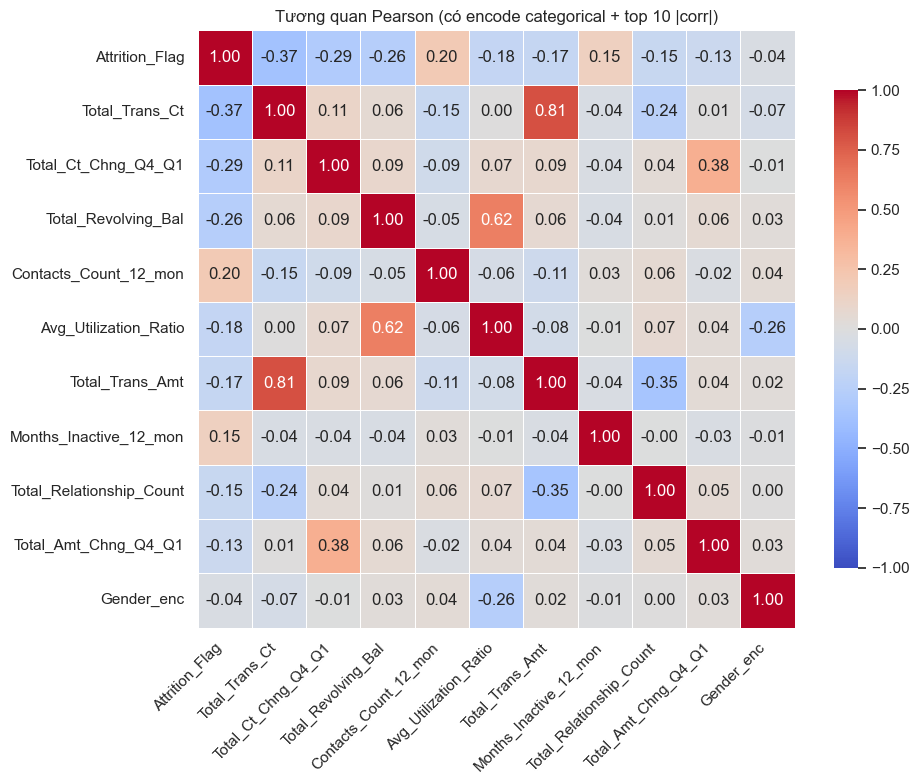

Top features theo |corr| (bao gồm categorical đã encode):
- Total_Trans_Ct
- Total_Ct_Chng_Q4_Q1
- Total_Revolving_Bal
- Contacts_Count_12_mon
- Avg_Utilization_Ratio
- Total_Trans_Amt
- Months_Inactive_12_mon
- Total_Relationship_Count
- Total_Amt_Chng_Q4_Q1
- Gender_enc


In [8]:
X_corr, feature_names_corr = build_feature_matrix_for_corr(data_np)
corr_matrix_all = np.corrcoef(X_corr, rowvar=False)

# giống logic cũ: lấy top 10 theo |corr| với target (target ở cột 0)
corr_with_target = corr_matrix_all[0, 1:]
other_features = np.array(feature_names_corr[1:])

top_k = 10
top_idx = np.argsort(np.abs(corr_with_target))[::-1][:top_k]
top_features = other_features[top_idx]

selected_features = np.concatenate((np.array(["Attrition_Flag"]), top_features))
feature_names_arr = np.array(feature_names_corr)

eq = (feature_names_arr[:, None] == selected_features[None, :])
selected_indices = np.argmax(eq, axis=0)

corr_small = corr_matrix_all[np.ix_(selected_indices, selected_indices)]
labels_small = selected_features

plt.figure(figsize=(10, 8))
sns.heatmap(
    corr_small,
    xticklabels=labels_small,
    yticklabels=labels_small,
    cmap="coolwarm",
    center=0,
    vmin=-1, vmax=1,
    square=True,
    linewidths=0.5,
    cbar_kws={"shrink": 0.8},
    annot=True, fmt=".2f"
)
plt.title("Tương quan Pearson (có encode categorical + top 10 |corr|)")
plt.xticks(rotation=45, ha="right")
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

print("Top features theo |corr| (bao gồm categorical đã encode):")
for f in top_features:
    print("-", f)

**Nhận xét**

- Ma trận trên là tương quan Pearson giữa `Attrition_Flag` và 10 biến có |corr| lớn nhất (có kèm tương quan giữa các biến đó với nhau). Vì `Attrition_Flag` đã mã hoá 0/1 nên: corr > 0 nghĩa là biến tăng thì xu hướng churn (Attrited) tăng, corr < 0 thì ngược lại.

- Tuy nhiên tương quan chỉ phản ánh quan hệ tuyến tính, nên mình dùng để lọc biến ban đầu chứ chưa kết luận nhân quả.
- Một điểm nữa là giữa các biến top cũng có thể tương quan cao với nhau (ví dụ các biến về giao dịch/chi tiêu thường đi chung). Nếu thấy cặp nào có |corr| rất lớn thì khi làm model cần cân nhắc đa cộng tuyến (chọn bớt biến, hoặc dùng regularization).
- Từ heatmap này, em sẽ ưu tiên mang các biến có |corr| cao nhất đi phân tích sâu ở phần sau (vẽ phân phối theo từng nhóm churn/non-churn) để xem khác biệt có rõ ràng không và có outlier không.

### Ý nghĩa về mặt ngữ nghĩa của Top 10 features (Phân nhóm)

Dựa vào kết quả phân tích tương quan Pearson, các yếu tố ảnh hưởng mạnh nhất được chia thành 4 nhóm chính:

#### 1. Nhóm hành vi giao dịch - Tác động mạnh nhất

1. **Total_Trans_Ct (Tổng số lần giao dịch)**
   - **Loại tương quan:** Âm (-).
   - **Ý nghĩa:** Chỉ báo quan trọng nhất. Khách hàng rời bỏ có tần suất sử dụng thẻ thấp hơn hẳn. Việc số lần quẹt thẻ ít đi là dấu hiệu rõ ràng nhất của việc khách hàng đang dần ngừng sử dụng dịch vụ.

2. **Total_Ct_Chng_Q4_Q1 (Tỷ lệ thay đổi số lần giao dịch Q4/Q1)**
   - **Loại tương quan:** Âm (-).
   - **Ý nghĩa:** Chỉ số phản ánh sự "nguội lạnh". Khách hàng rời bỏ giảm mạnh tần suất giao dịch vào cuối năm (Q4) so với đầu năm (Q1). Sự tụt giảm đột ngột này là báo động đỏ.

6. **Total_Trans_Amt (Tổng số tiền giao dịch)**
   - **Loại tương quan:** Âm (-).
   - **Ý nghĩa:** Tương tự như số lần giao dịch, tổng số tiền chi tiêu của nhóm rời bỏ thấp hơn đáng kể so với nhóm hiện tại.

9. **Total_Amt_Chng_Q4_Q1 (Thay đổi số tiền giao dịch Q4/Q1)**
   - **Loại tương quan:** Âm (-).
   - **Ý nghĩa:** Bên cạnh việc giảm số lần, việc giảm mạnh ngân sách chi tiêu qua thẻ vào cuối năm cũng là dấu hiệu cho thấy khách hàng đang rút dần hoạt động tài chính.

#### 2. Nhóm tình trạng tài khoản & Gắn kết

1. **Total_Revolving_Bal (Tổng dư nợ xoay vòng)**
   - **Loại tương quan:** Âm (-).
   - **Ý nghĩa:** Khách hàng rời bỏ thường có dư nợ rất thấp hoặc bằng 0. Điều này ngụ ý họ đã thanh toán sạch nợ để chuẩn bị đóng thẻ, hoặc họ không coi đây là thẻ chính để chi tiêu (nên không phát sinh dư nợ).

5. **Avg_Utilization_Ratio (Tỷ lệ sử dụng hạn mức trung bình)**
   - **Loại tương quan:** Âm (-).
   - **Ý nghĩa:** Tỷ lệ này thấp chứng tỏ khách hàng không tận dụng hạn mức tín dụng được cấp. Thẻ không mang lại giá trị thanh khoản cho họ -> dễ bị hủy.

8. **Total_Relationship_Count (Tổng số sản phẩm sở hữu)**
   - **Loại tương quan:** Âm (-).
   - **Ý nghĩa:** Số lượng sản phẩm tỷ lệ nghịch với khả năng rời bỏ. Khách hàng sở hữu nhiều dịch vụ (Combo Thẻ + Tiết kiệm + Vay...) sẽ gắn bó chặt chẽ hơn với hệ sinh thái của ngân hàng.

#### 3. Nhóm tương tác & Trạng thái

1. **Contacts_Count_12_mon (Số lần liên hệ ngân hàng)**
   - **Loại tương quan:** Dương (+).
   - **Ý nghĩa:** Khách hàng liên hệ càng nhiều (gọi tổng đài, khiếu nại...), nguy cơ rời bỏ càng cao. Có thể họ gặp sự cố không được giải quyết thỏa đáng nên dẫn đến quyết định hủy dịch vụ.

7. **Months_Inactive_12_mon (Số tháng không hoạt động)**
   - **Loại tương quan:** Dương (+).
   - **Ý nghĩa:** Thời gian "ngủ đông" càng dài (ví dụ: 3 tháng liên tiếp không có giao dịch), khả năng khách hàng đóng thẻ càng cao.

#### 4. Nhóm nhân khẩu học

1. **Gender_enc (Giới tính)**
    - **Loại tương quan:** Phụ thuộc vào mã hóa (0/1).
    - **Ý nghĩa:** Yếu tố nhân khẩu học duy nhất lọt vào Top 10. Điều này cho thấy có sự khác biệt về tỷ lệ rời bỏ giữa Nam và Nữ, cần lưu ý khi xây dựng chiến lược tiếp cận riêng.

## 2.2. Quan sát chi tiết

Ở phần này, em sẽ khám phá kỹ hơn các cột (và nhóm cột) có mức tương quan cao với `Attrition_Flag` mà mình đã tìm được ở phần ma trận tương quan phía trên.

Những biến có ý nghĩa gần nhau (ví dụ nhóm giao dịch như số lần, số tiền, các chỉ số thay đổi theo quý, ...) em sẽ gom lại trình bày chung một mục để dễ so sánh.

### 2.2.1. Nhóm hành vi giao dịch

Đây là hai đặc trưng có tương quan âm mạnh nhất với biến mục tiêu. Em sẽ sử dụng các biểu đồ sau để quan sát:
1.  **Histogram & KDE:** Xem phân phối xác suất.
2.  **Boxplot:** Xem khoảng giá trị và điểm ngoại lai.
3.  **Scatter Plot:** Xem mối quan hệ hai chiều giữa Số lần và Số tiền giao dịch.

=== 1. Phân tích: Total_Trans_Ct (Tổng số lần giao dịch) ===


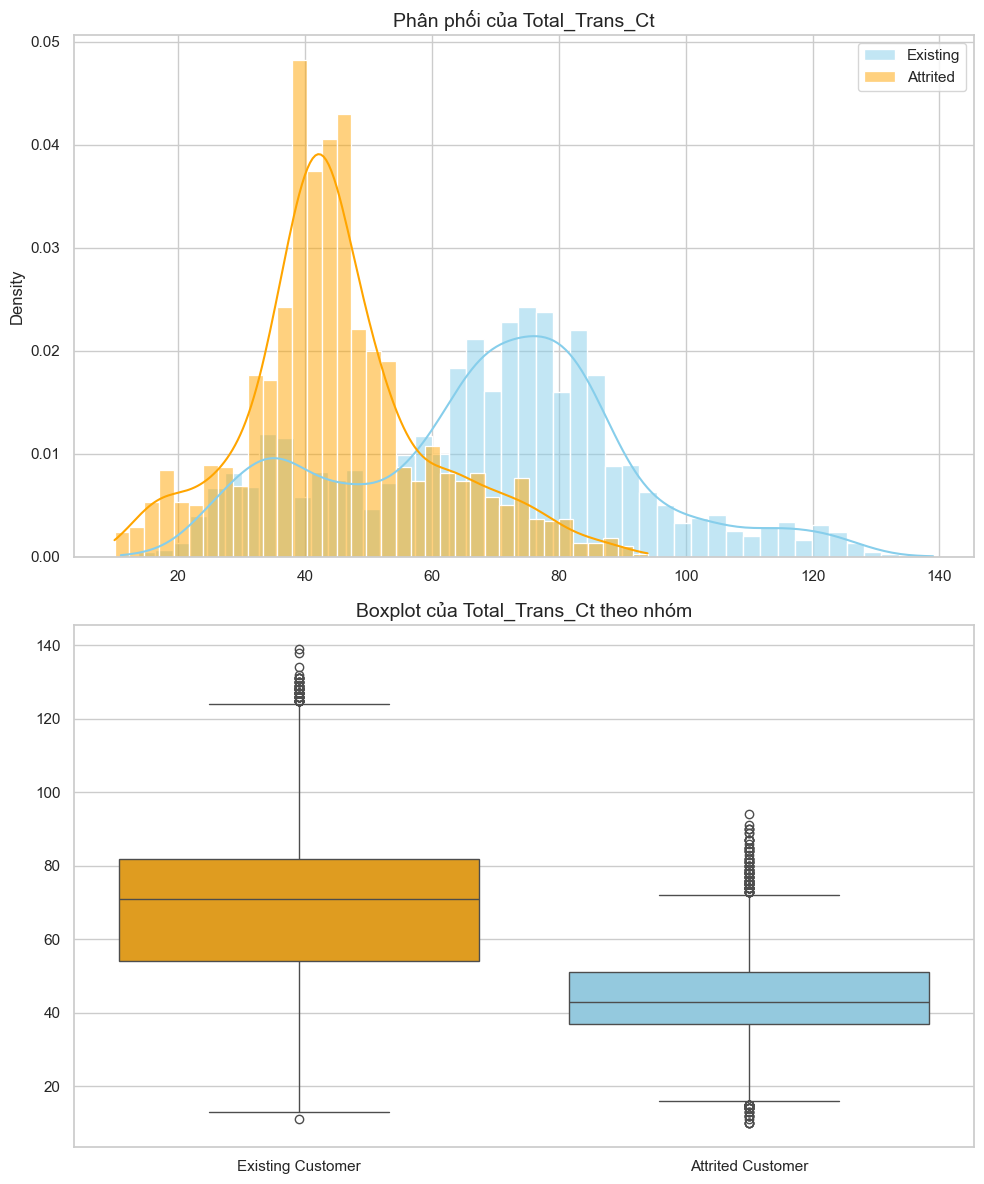

=== 2. Phân tích: Total_Trans_Amt (Tổng số tiền giao dịch) ===


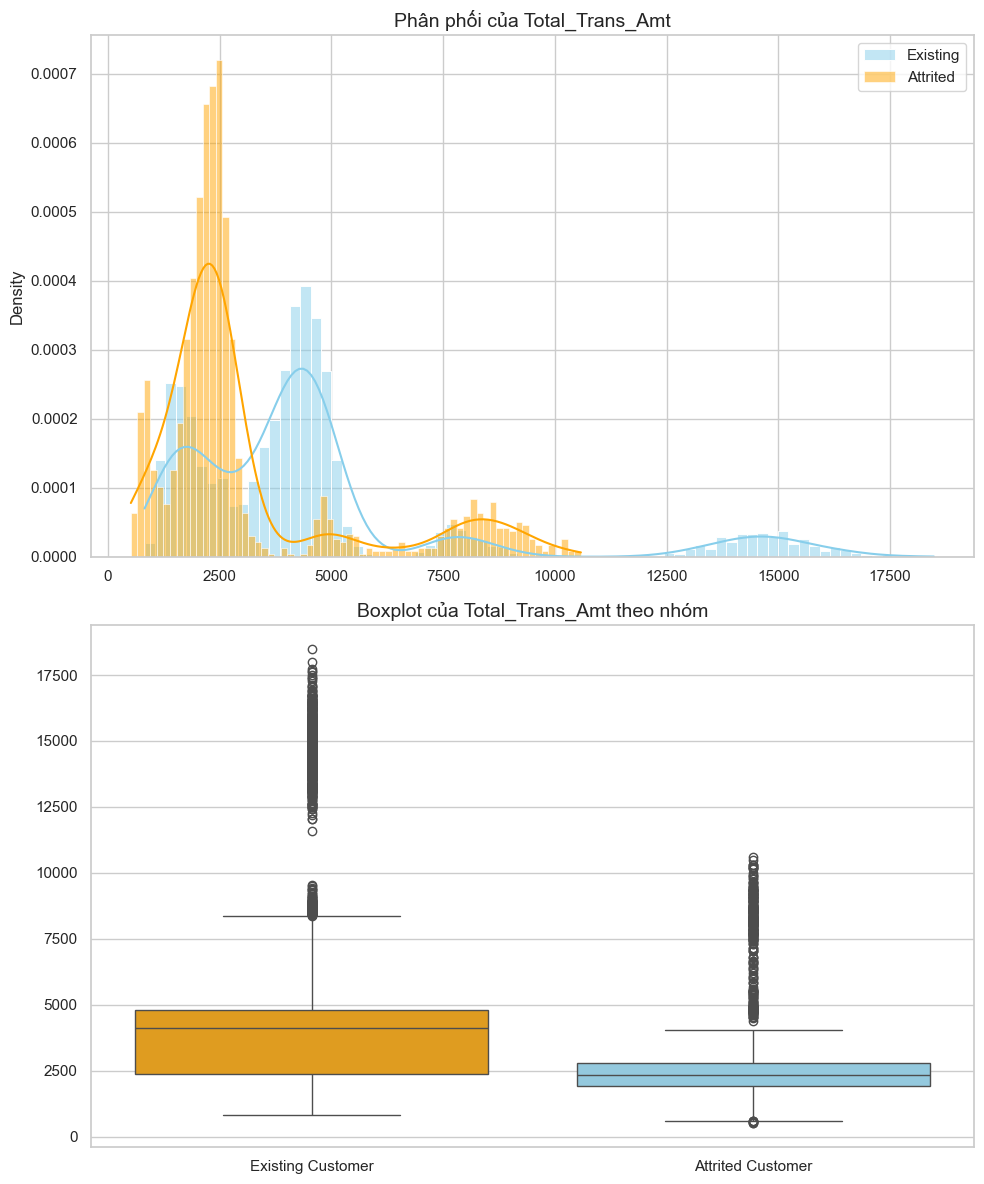

=== 3. Phân tích: Total_Ct_Chng_Q4_Q1 (Thay đổi số lần giao dịch Q4/Q1) ===


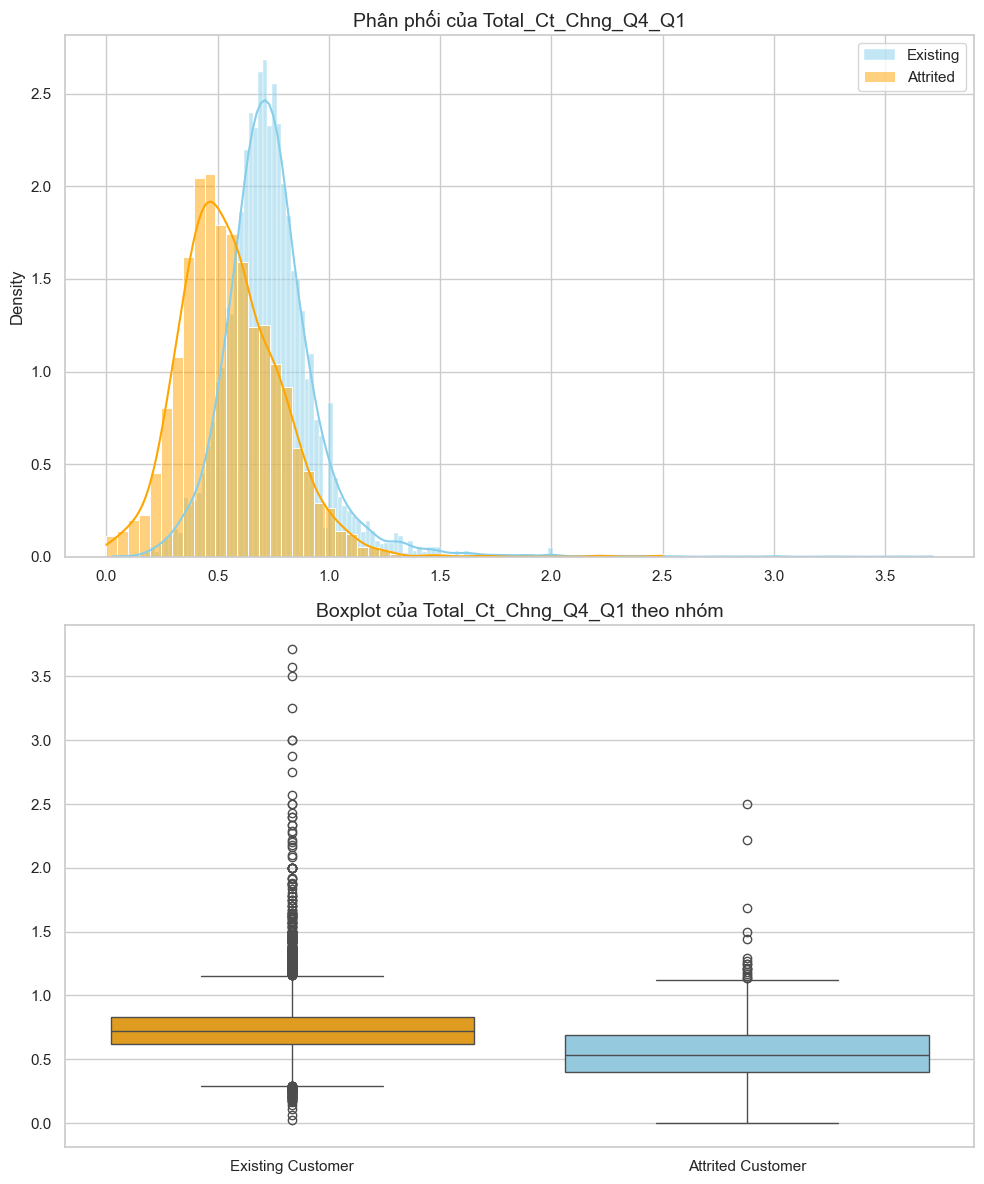

=== 4. Phân tích: Total_Amt_Chng_Q4_Q1 (Thay đổi số tiền giao dịch Q4/Q1) ===


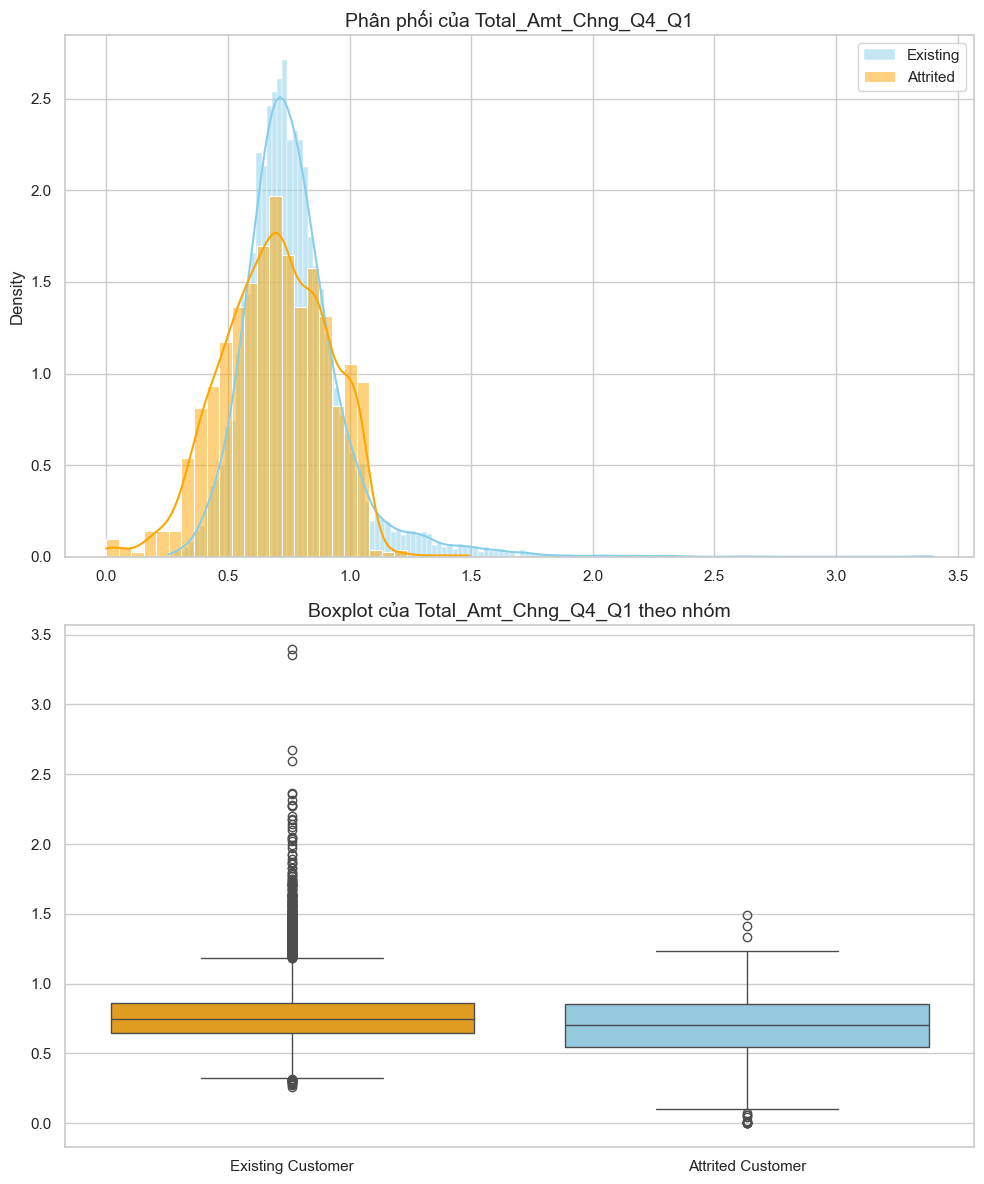

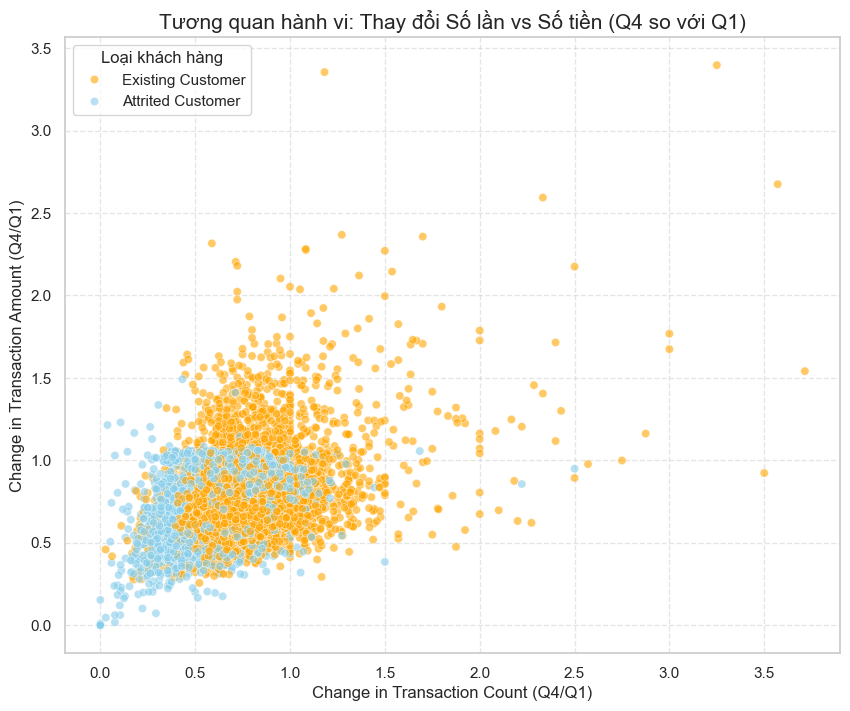

In [10]:
print("=== 1. Phân tích: Total_Trans_Ct (Tổng số lần giao dịch) ===")
plot_feature_distribution(data_np, 'Total_Trans_Ct')

print("=== 2. Phân tích: Total_Trans_Amt (Tổng số tiền giao dịch) ===")
plot_feature_distribution(data_np, 'Total_Trans_Amt')

print("=== 3. Phân tích: Total_Ct_Chng_Q4_Q1 (Thay đổi số lần giao dịch Q4/Q1) ===")
plot_feature_distribution(data_np, 'Total_Ct_Chng_Q4_Q1')

print("=== 4. Phân tích: Total_Amt_Chng_Q4_Q1 (Thay đổi số tiền giao dịch Q4/Q1) ===")
plot_feature_distribution(data_np, 'Total_Amt_Chng_Q4_Q1')

# 5. Vẽ Scatter Plot để xem tương quan giữa 2 biến thay đổi (Change variables)
# Giúp trả lời: Khách hàng giảm số lần quẹt thẻ thì có giảm số tiền chi tiêu tương ứng không?
plt.figure(figsize=(10, 8))
sns.scatterplot(
    x=data_np['Total_Ct_Chng_Q4_Q1'],
    y=data_np['Total_Amt_Chng_Q4_Q1'],
    hue=data_np['Attrition_Flag'],
    palette=['orange', 'skyblue'],
    alpha=0.6
)
plt.title('Tương quan hành vi: Thay đổi Số lần vs Số tiền (Q4 so với Q1)', fontsize=15)
plt.xlabel('Change in Transaction Count (Q4/Q1)', fontsize=12)
plt.ylabel('Change in Transaction Amount (Q4/Q1)', fontsize=12)
plt.legend(title='Loại khách hàng')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

**Nhận xét: Nhóm hành vi giao dịch**

Dựa trên phân tích biểu đồ phân phối và tương quan, ta rút ra các đặc điểm hành vi chính của nhóm khách hàng rời bỏ:

**1. Total_Trans_Ct (Tổng số lần giao dịch)**
* **Vùng nguy hiểm:** Những khách hàng có tần suất giao dịch thấp, đặc biệt trong khoảng **40-50 giao dịch/năm**, có tỷ lệ rời bỏ cực cao.
* **Vùng an toàn:** Khi số lần giao dịch vượt qua mốc **60 lần/năm**, tỷ lệ rời bỏ giảm xuống gần bằng 0.
* **Insight:** Tần suất sử dụng chính là "vắc-xin" chống rời bỏ hiệu quả nhất. Chỉ cần duy trì thói quen quẹt thẻ đều đặn, khách hàng sẽ có xu hướng ở lại lâu dài.

**2. Total_Trans_Amt (Tổng số tiền giao dịch)**
* **Nghịch lý thú vị:** Dù nhìn chung số tiền chi tiêu thấp đi kèm rủi ro cao, nhưng dữ liệu cho thấy một nhóm khách hàng rời bỏ có mức chi tiêu khá cao (khoảng **2.500 USD**).
* **Insight:** Đừng chỉ nhìn vào ví tiền. Một khách hàng tiêu số tiền lớn nhưng tần suất ít (quẹt một lần lớn rồi thôi) vẫn có nguy cơ rời bỏ cao hơn người tiêu ít tiền nhưng lắt nhắt nhiều lần.

**3. Total_Ct_Chng_Q4_Q1 & Total_Amt_Chng_Q4_Q1 (Thay đổi hành vi Q4/Q1)**
* **Dấu hiệu "nguội lạnh":** Đỉnh phân phối của nhóm rời bỏ nằm tập trung ở khoảng **0.5 - 0.6**. Điều này nghĩa là vào cuối năm, hoạt động của họ chỉ còn bằng một nửa so với đầu năm.
* **Insight:** Sự tụt giảm phong độ chính là lời chia tay thầm lặng. Nếu thấy chỉ số hoạt động của khách hàng lao dốc vào Quý 4, ngân hàng cần hành động ngay lập tức.

**4. Tương quan (Scatter Plot: Q4/Q1 Count vs Amount)**
* **Góc chết (The Dead Zone):** Nhóm rời bỏ (màu cam) co cụm rất chặt ở góc dưới bên trái của biểu đồ (giá trị < 0.8 cho cả hai trục).
* **Insight:** Khi một khách hàng vừa giảm số lần mua, vừa cắt giảm số tiền mua cùng một lúc, họ gần như chắc chắn đã chuẩn bị tâm lý để ra đi.

> **Kết luận:** Chiến lược "giữ lửa" tần suất giao dịch quan trọng hơn việc cố gắng ép khách hàng tiêu số tiền lớn. Cần thiết lập hệ thống cảnh báo sớm cho những khách hàng có dấu hiệu "nguội lạnh" vào dịp cuối năm.

### 2.2.2. Nhóm tình trạng tài khoản & Gắn kết

Nhóm này phản ánh mức độ phụ thuộc tài chính và sự gắn bó của khách hàng với hệ sinh thái ngân hàng. Các biến quan trọng gồm: **Total_Revolving_Bal** (Dư nợ), **Avg_Utilization_Ratio** (Tỷ lệ sử dụng) và **Total_Relationship_Count** (Số lượng sản phẩm).

Em sẽ sử dụng các biểu đồ sau để quan sát:
1.  **Histogram & KDE:** Xem phân phối mật độ của dư nợ và số lượng sản phẩm sở hữu.
2.  **Boxplot:** So sánh sự khác biệt về trung vị và độ phân tán giữa nhóm Rời bỏ và Hiện tại.
3.  **Scatter Plot:** Quan sát mối quan hệ tương quan giữa Tổng dư nợ và Tỷ lệ sử dụng hạn mức để tìm ra các mẫu hình rủi ro.

=== 1. Phân tích: Total_Revolving_Bal (Tổng dư nợ xoay vòng) ===


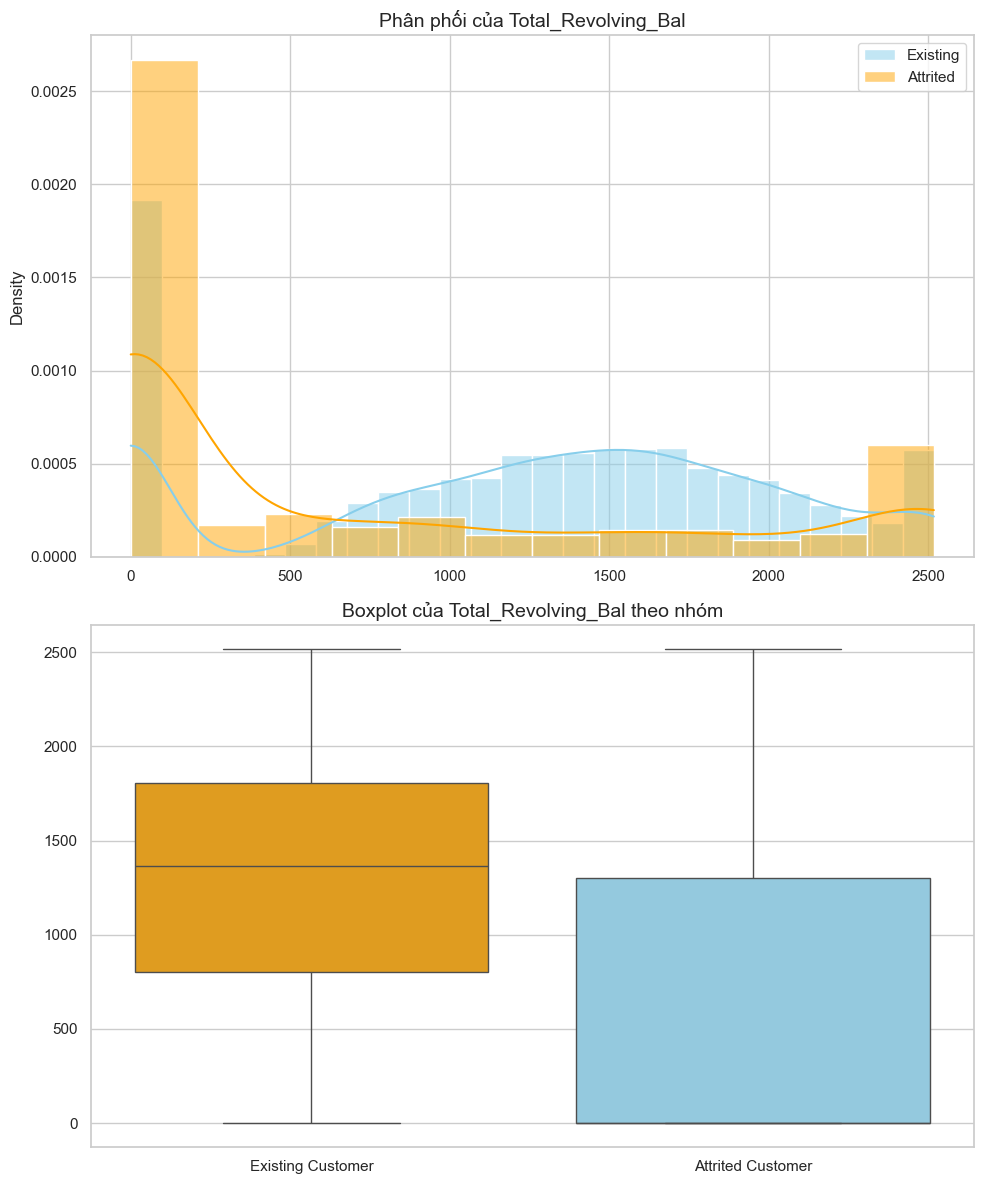

=== 2. Phân tích: Avg_Utilization_Ratio (Tỷ lệ sử dụng hạn mức trung bình) ===


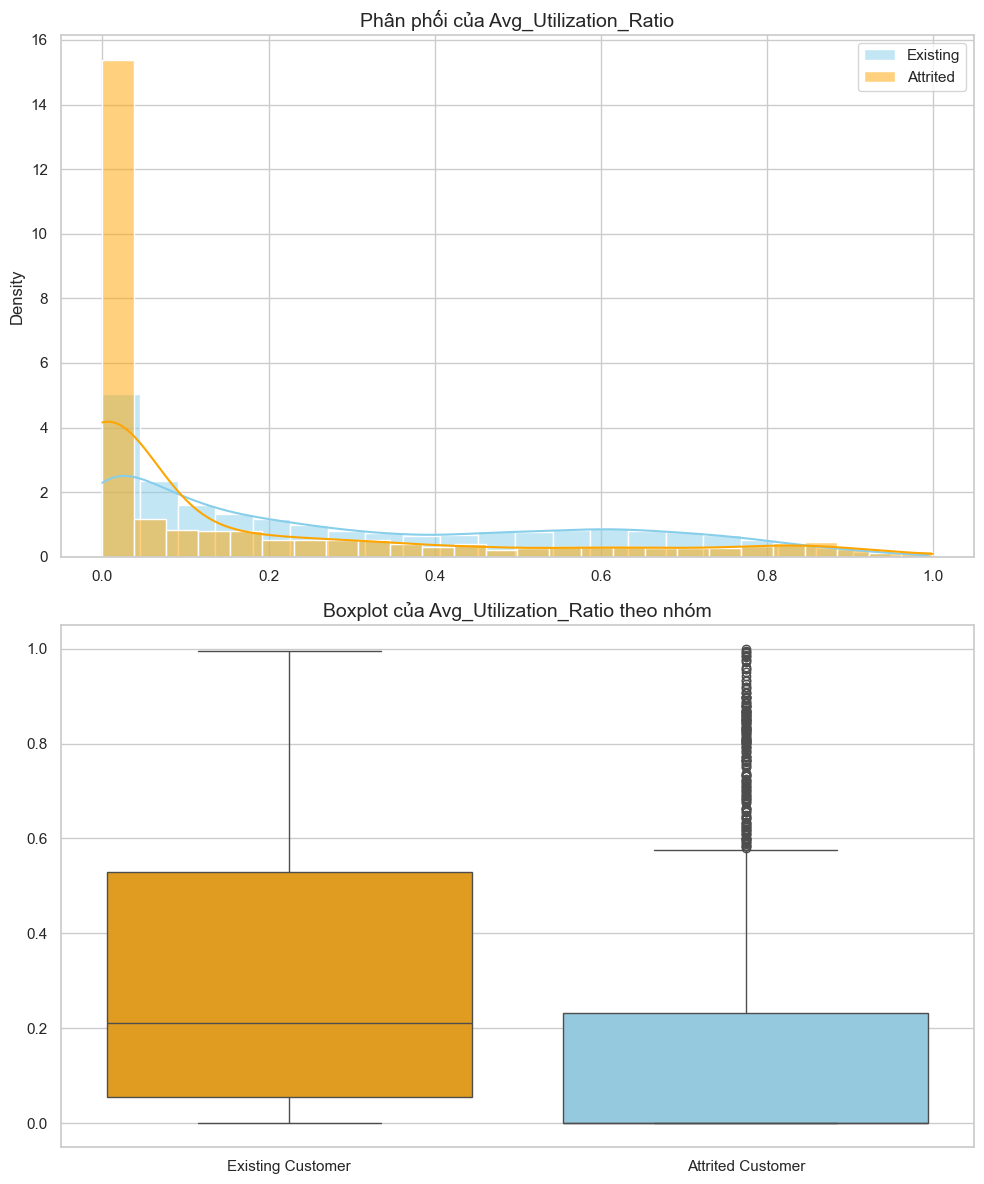

=== 3. Phân tích: Total_Relationship_Count (Tổng số sản phẩm sở hữu) ===


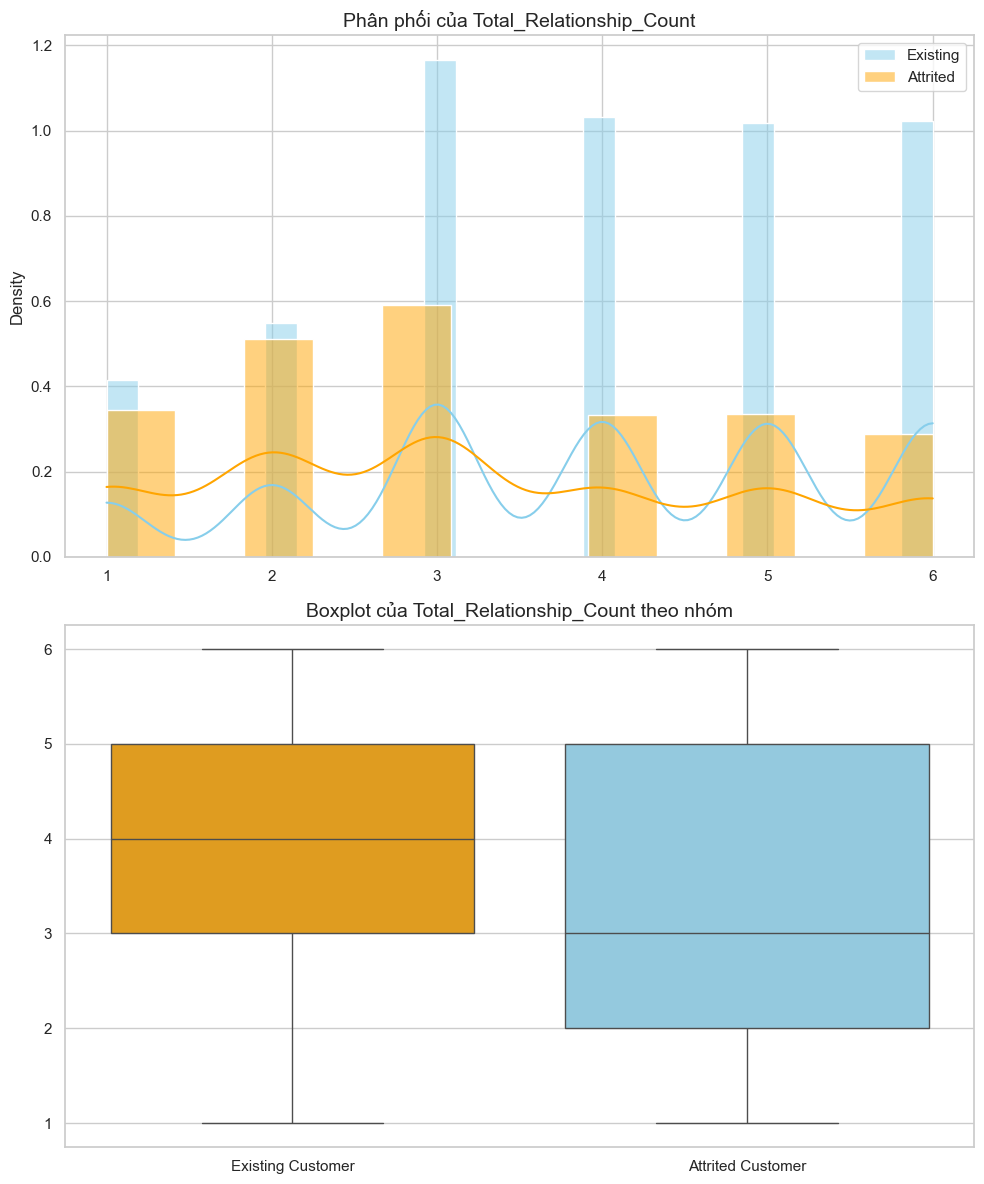

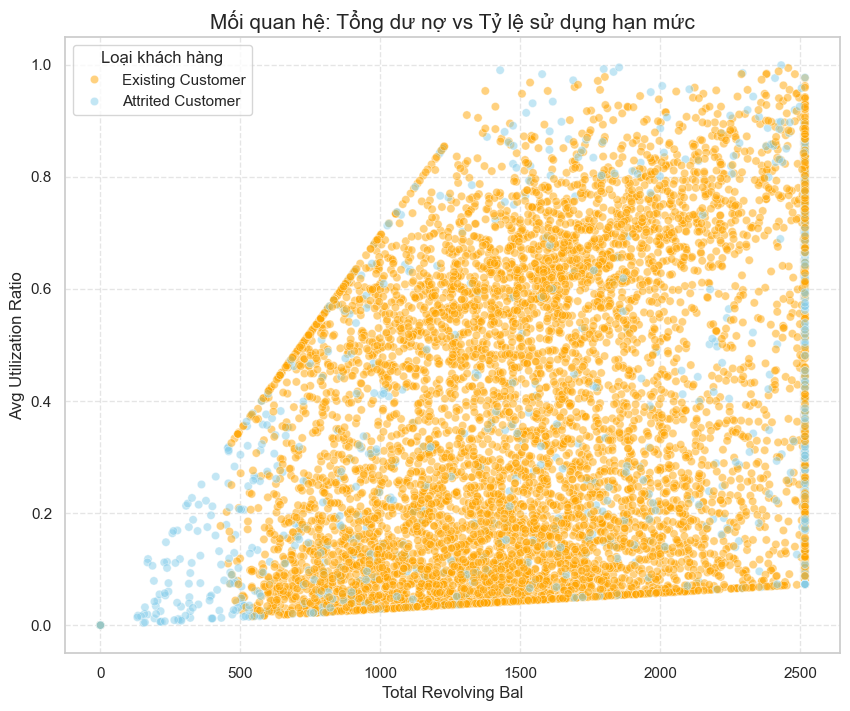

In [ ]:
print("=== 1. Phân tích: Total_Revolving_Bal (Tổng dư nợ xoay vòng) ===")
plot_feature_distribution(data_np, 'Total_Revolving_Bal')

print("=== 2. Phân tích: Avg_Utilization_Ratio (Tỷ lệ sử dụng hạn mức trung bình) ===")
plot_feature_distribution(data_np, 'Avg_Utilization_Ratio')

print("=== 3. Phân tích: Total_Relationship_Count (Tổng số sản phẩm sở hữu) ===")
# Biến này là số nguyên (1-6), vẽ histplot vẫn ổn nhưng cần chú ý bins
plot_feature_distribution(data_np, 'Total_Relationship_Count')

# 4. Vẽ Scatter Plot: Dư nợ vs Tỷ lệ sử dụng
# Mối quan hệ này có vẻ hiển nhiên (Dư nợ cao -> Tỷ lệ cao), 
# nhưng ta cần xem nhóm Rời bỏ (màu cam) nằm ở đâu trong bức tranh này.
plt.figure(figsize=(10, 8))
sns.scatterplot(
    x=data_np['Total_Revolving_Bal'],
    y=data_np['Avg_Utilization_Ratio'],
    hue=data_np['Attrition_Flag'],
    palette=['orange', 'skyblue'],
    alpha=0.5
)
plt.title('Mối quan hệ: Tổng dư nợ vs Tỷ lệ sử dụng hạn mức', fontsize=15)
plt.xlabel('Total Revolving Bal', fontsize=12)
plt.ylabel('Avg Utilization Ratio', fontsize=12)
plt.legend(title='Loại khách hàng')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

**Nhận xét: Nhóm tình trạng tài khoản & Gắn kết**

Dựa trên các biểu đồ phân tích, sự gắn bó của khách hàng được thể hiện rất rõ qua "độ nợ" và số lượng dịch vụ họ sử dụng:

**1. Total_Revolving_Bal (Tổng dư nợ xoay vòng)**
* **Hội chứng "Sạch nợ":** Một đặc điểm cực kỳ nổi bật trên biểu đồ là nhóm khách hàng rời bỏ (Attrited) tập trung dày đặc ở mức **0**.
* **Insight:** Khi số dư nợ về 0, sợi dây ràng buộc tài chính giữa khách hàng và ngân hàng biến mất. Đây thường là bước "dọn đường" cuối cùng trước khi họ gọi điện yêu cầu đóng thẻ.

**2. Avg_Utilization_Ratio (Tỷ lệ sử dụng hạn mức)**
* **Thẻ "ngủ đông":** Tương tự như dư nợ, nhóm rời bỏ có tỷ lệ sử dụng rất thấp, gần như sát đáy trục hoành.
* **Insight:** Một chiếc thẻ tín dụng nằm trong ví mà không được sử dụng (Utilization thấp) là chiếc thẻ có nguy cơ bị hủy cao nhất. Ngược lại, những khách hàng thường xuyên tiêu dùng (dùng trên 20-30% hạn mức) lại rất trung thành.

**3. Total_Relationship_Count (Tổng số sản phẩm)**
* **Sức mạnh của Hệ sinh thái:** Tỷ lệ rời bỏ giảm dần khi số lượng sản phẩm tăng lên. Những khách hàng chỉ dùng 1-2 sản phẩm rất dễ ra đi.
* **Insight:** Rất khó để một người rời bỏ ngân hàng nếu họ bị "trói buộc" bởi nhiều dịch vụ cùng lúc (Thẻ + Tài khoản lương + Tiết kiệm...). Bán chéo (Cross-selling) chính là chìa khóa giữ chân khách hàng.

**4. Scatter Plot (Dư nợ vs Tỷ lệ sử dụng)**
* **Vùng rủi ro:** Các điểm màu cam (Rời bỏ) co cụm hoàn toàn ở góc dưới bên trái (Dư nợ thấp + Tỷ lệ dùng thấp).
* **Insight:** Không có ngoại lệ nào đáng kể (rất hiếm ai đang nợ đầm đìa mà lại bỏ đi). Điều này khẳng định chân lý: **Khách hàng càng nợ, ngân hàng càng an tâm (về việc họ không rời bỏ).**

### 2.2.3. Nhóm tương tác & Trạng thái

Nhóm này chứa các tín hiệu cảnh báo sớm quan trọng về sự không hài lòng (liên hệ nhiều) hoặc sự thờ ơ (không hoạt động) của khách hàng. Các biến phân tích gồm: **Contacts_Count_12_mon** và **Months_Inactive_12_mon**.

Phương pháp quan sát:
1.  **Phân phối & Boxplot:** Xem sự khác biệt về số lượng liên hệ và thời gian "ngủ đông" giữa hai nhóm.
2.  **Tỷ lệ rời bỏ theo nhóm (Attrition Rate):** Vì các giá trị này là số nguyên rời rạc (0, 1, 2... 6), ta sẽ quan sát kỹ xem tại ngưỡng nào thì tỷ lệ rời bỏ tăng vọt (ví dụ: Liên hệ > 4 lần?).

=== 1. Phân tích: Contacts_Count_12_mon (Số lần liên hệ trong 12 tháng) ===


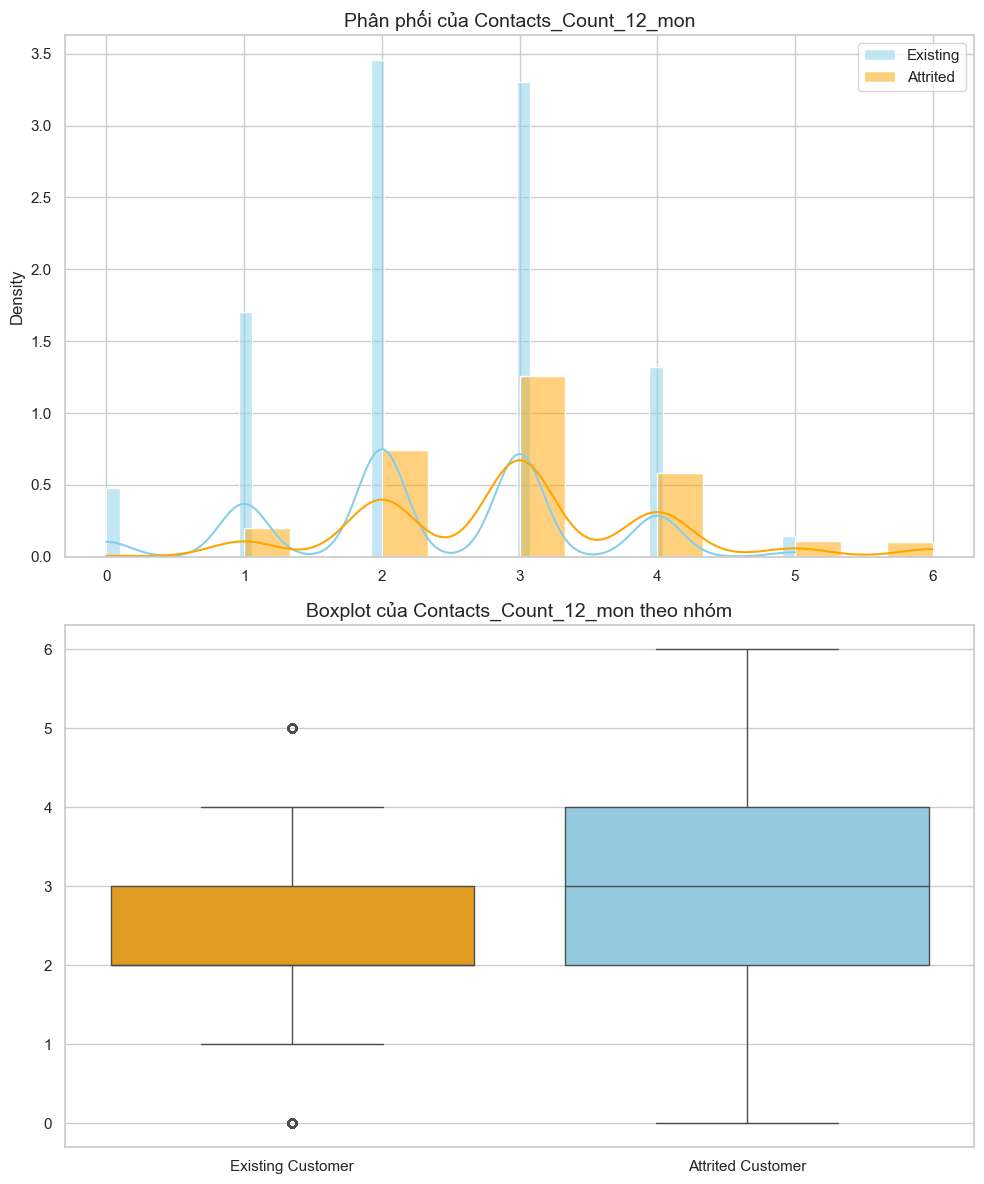

=== 2. Phân tích: Months_Inactive_12_mon (Số tháng không hoạt động trong 12 tháng) ===


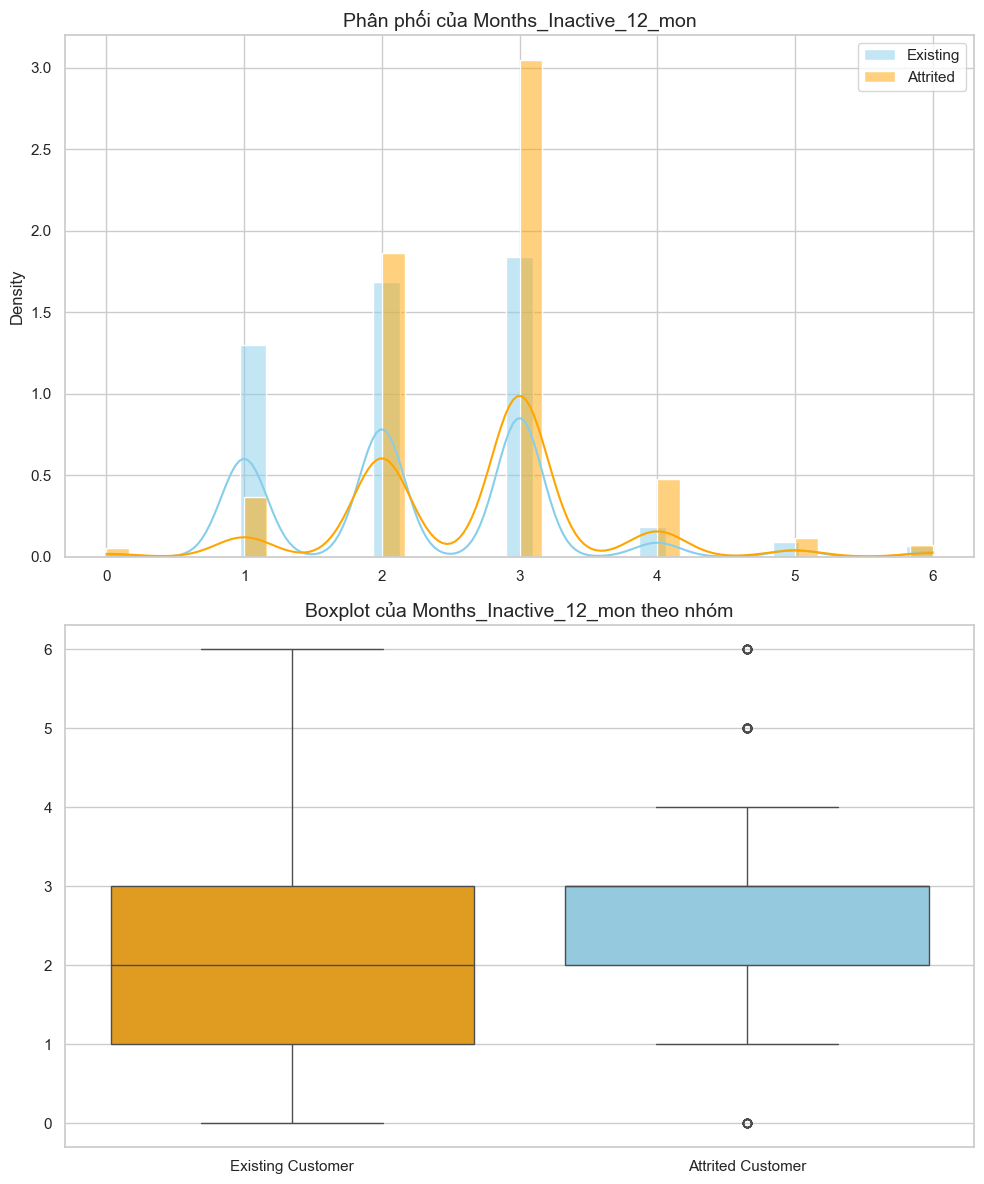

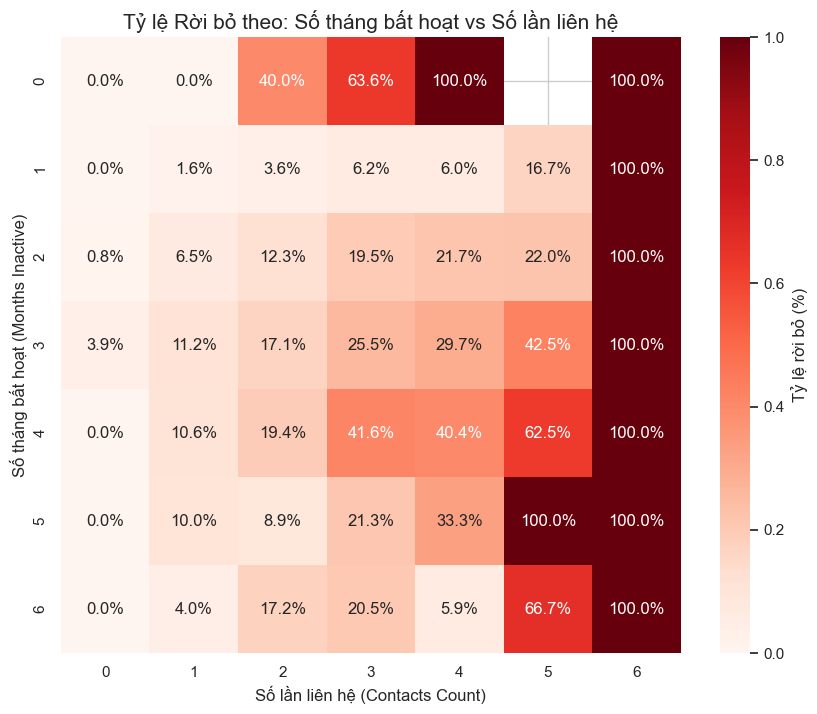

In [13]:
print("=== 1. Phân tích: Contacts_Count_12_mon (Số lần liên hệ trong 12 tháng) ===")
plot_feature_distribution(data_np, 'Contacts_Count_12_mon')

print("=== 2. Phân tích: Months_Inactive_12_mon (Số tháng không hoạt động trong 12 tháng) ===")
plot_feature_distribution(data_np, 'Months_Inactive_12_mon')

# 3. Vẽ biểu đồ nhiệt (Heatmap) thể hiện Tỷ lệ Rời bỏ (Attrition Rate)
# Logic: Tính trung bình tỷ lệ rời bỏ (Attrited=1, Existing=0) cho từng cặp (Months_Inactive, Contacts_Count)

# Chuẩn bị dữ liệu
contacts = data_np['Contacts_Count_12_mon']
months_inactive = data_np['Months_Inactive_12_mon']
# Mã hóa: Attrited = 1, Existing = 0
is_churn = (data_np['Attrition_Flag'] == 'Attrited Customer').astype(int)

# Xác định các giá trị duy nhất cho trục X và Y (để tạo lưới)
x_vals = np.unique(contacts) # 0, 1, 2, 3, 4, 5, 6
y_vals = np.unique(months_inactive) # 0, 1, ..., 6

# Khởi tạo ma trận kết quả (Heatmap data)
heatmap_data = np.zeros((len(y_vals), len(x_vals)))

# Dùng vòng lặp để tính mean(is_churn) cho từng ô
for i, y in enumerate(y_vals):
    for j, x in enumerate(x_vals):
        # Tạo mặt nạ lọc dữ liệu thỏa mãn cả 2 điều kiện
        mask = (months_inactive == y) & (contacts == x)
        
        if np.sum(mask) > 0:
            churn_rate = np.mean(is_churn[mask])
            heatmap_data[i, j] = churn_rate
        else:
            heatmap_data[i, j] = np.nan # Không có dữ liệu thì để NaN

# Vẽ Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(
    heatmap_data, 
    annot=True, 
    fmt=".1%", 
    cmap='Reds', 
    xticklabels=x_vals,
    yticklabels=y_vals,
    cbar_kws={'label': 'Tỷ lệ rời bỏ (%)'}
)
plt.title('Tỷ lệ Rời bỏ theo: Số tháng bất hoạt vs Số lần liên hệ', fontsize=15)
plt.ylabel('Số tháng bất hoạt (Months Inactive)')
plt.xlabel('Số lần liên hệ (Contacts Count)')
plt.show()

**Nhận xét: Nhóm tương tác & Trạng thái**

Dựa trên biểu đồ nhiệt (Heatmap) và phân phối, hành vi "kêu ca" và "ngủ đông" của khách hàng vẽ nên một bức tranh rất rõ ràng:

**1. Contacts_Count_12_mon (Số lần liên hệ)**
* **Vùng tử thần (Death Zone):** Quan sát Heatmap, cột **"6 lần liên hệ"** đỏ rực với tỷ lệ rời bỏ lên tới **100%**.
* **Insight:** Đây là con số "giọt nước tràn ly". Khi một khách hàng phải gọi điện cho ngân hàng tới 6 lần trong một năm, chắc chắn họ đang gặp vấn đề cực kỳ bức xúc và việc họ rời bỏ là điều tất yếu. Ngưỡng báo động đỏ cần đặt ra là **>= 4 lần**.

**2. Months_Inactive_12_mon (Số tháng không hoạt động)**
* **Ngưỡng 3-4 tháng:** Tỷ lệ rời bỏ tăng vọt ở mốc không hoạt động từ **3 đến 4 tháng**.
* **Insight:** Đây là khoảng thời gian "thử thách". Nếu sau 3 tháng khách hàng không quay lại giao dịch, khả năng cao họ đã tìm được thẻ của ngân hàng khác thay thế.

**3. Sự cộng hưởng (Heatmap)**
* **Góc nguy hiểm:** Sự kết hợp giữa **"Liên hệ nhiều"** (>= 4 lần) và **"Ngủ đông"** (>= 3 tháng) tạo ra các ô màu đỏ đậm (tỷ lệ rời bỏ rất cao).
* **Insight:** Khách hàng nguy hiểm nhất không phải là người im lặng, mà là người **vừa phàn nàn nhiều, vừa ngừng sử dụng dịch vụ**. Đây là nhóm ưu tiên số 1 cần đội ngũ Chăm sóc khách hàng can thiệp ngay lập tức.

### 2.2.4. Nhóm nhân khẩu học

Trong số các biến nhân khẩu học (Tuổi, Học vấn, Thu nhập...), chỉ có **Giới tính (Gender)** lọt vào Top 10 yếu tố có tương quan đáng kể với việc rời bỏ.

Em sẽ thực hiện:
1.  **Bar Chart (Countplot):** So sánh số lượng khách hàng rời bỏ giữa Nam và Nữ.
2.  **Tính tỷ lệ thực tế:** Sử dụng Numpy để tính chính xác % rời bỏ của từng giới xem nhóm nào rủi ro hơn.

=== Phân tích: Gender (Giới tính) ===


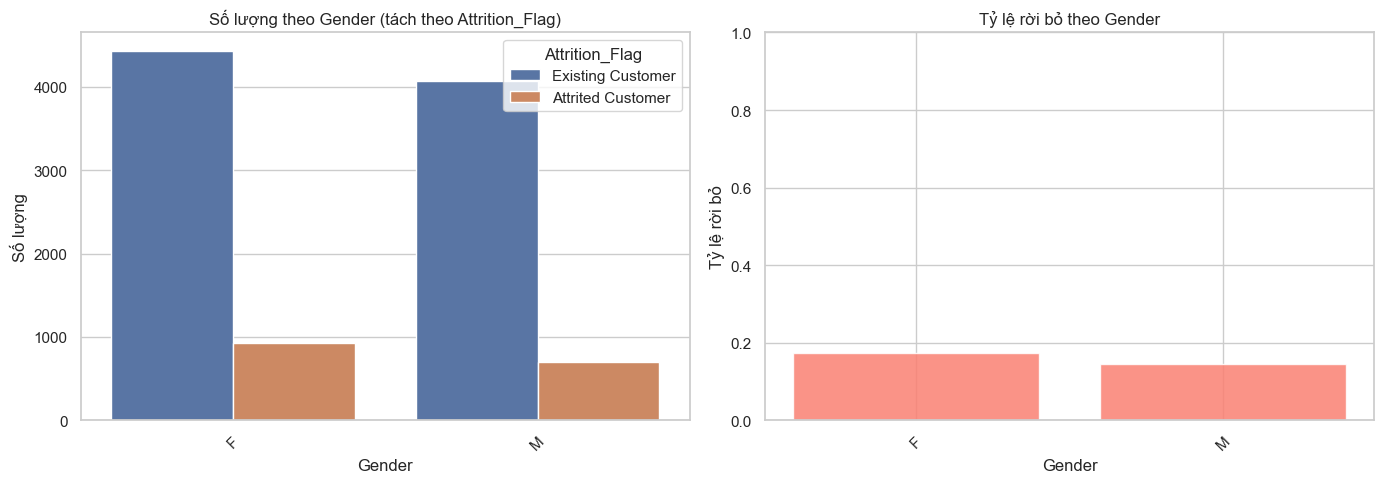

--- Thống kê chi tiết ---
Tỷ lệ rời bỏ ở Nữ (F): 17.36%
Tỷ lệ rời bỏ ở Nam (M): 14.62%
Chênh lệch: 2.74%


In [16]:
# 1. Vẽ biểu đồ so sánh số lượng
print("=== Phân tích: Gender (Giới tính) ===")
plot_categorical_analysis(data_np, 'Gender')

# 2. Tính tỷ lệ rời bỏ cụ thể cho Nam và Nữ bằng Numpy
# Lấy dữ liệu
genders = data_np['Gender']
targets = data_np['Attrition_Flag']

# Tạo mask
mask_female = (genders == 'F')
mask_male = (genders == 'M')
mask_attrited = (targets == 'Attrited Customer')

# Tính tỷ lệ
# Tỷ lệ rời bỏ = (Số người rời bỏ trong nhóm) / (Tổng số người trong nhóm)
churn_rate_f = np.mean(mask_attrited[mask_female])
churn_rate_m = np.mean(mask_attrited[mask_male])

print(f"--- Thống kê chi tiết ---")
print(f"Tỷ lệ rời bỏ ở Nữ (F): {churn_rate_f:.2%}")
print(f"Tỷ lệ rời bỏ ở Nam (M): {churn_rate_m:.2%}")

# So sánh nhanh
diff = abs(churn_rate_f - churn_rate_m)
print(f"Chênh lệch: {diff:.2%}")

**Nhận xét: Nhóm nhân khẩu học**

Dựa trên thống kê thực tế, **Giới tính** là yếu tố nhân khẩu học duy nhất có sự phân hóa đáng chú ý về tỷ lệ rời bỏ, trong khi các yếu tố khác (Thu nhập, Học vấn) lại không lọt vào Top 10.

**1. Gender (Giới tính)**
* **Khoảng cách giới tính (Gender Gap):** Tỷ lệ rời bỏ ở nhóm **Nữ (17.36%)** cao hơn rõ rệt so với nhóm **Nam (14.62%)**.
* **Mức chênh lệch:** **~2.74%**.
* **Insight:** Ngân hàng đang làm tốt hơn trong việc giữ chân phái mạnh. Ngược lại, nhóm khách hàng nữ có xu hướng "nhạy cảm" hơn và dễ rời đi hơn. Điều này đặt ra câu hỏi về tính phù hợp của các sản phẩm/ưu đãi hiện tại: Liệu chúng đã thực sự hấp dẫn với nhu cầu tiêu dùng và thói quen quản lý tài chính của phụ nữ hay chưa?